In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

sns.set_style("darkgrid")

In [ ]:
dataset_path = r"/content/India-Tourism-Statistics-2021-Table-5.2.3.csv"

In [ ]:
# Loading dataset
df = pd.read_csv(dataset_path)

df.head()

Circle Name of the Monument   Domestic-2019-20  Foreign-2019-20  \
0   Agra             Taj Mahal           4429710           645415   
1   Agra             Agra Fort           1627154           386522   
2   Agra        Fatehpur Sikri            454376           184751   
3   Agra   Akbar Tomb Sikandra            229270            19625   
4   Agra  Mariam tomb Sikandra             22517              414   

   Domestic-2020-21  Foreign-2020-21  % Growth 2021-21/2019-20-Domestic  \
0           1259892             9034                             -71.56   
1            371242             2810                             -77.18   
2            107835              574                             -76.27   
3             99509              321                             -56.60   
4              9765               31                             -56.63   

   % Growth 2021-21/2019-20-Foreign  
0                            -98.60  
1                            -99.27  
2                            -99.69  
3                            -98.36  
4                            -92.51

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Circle                             178 non-null    object 
 1   Name of the Monument               178 non-null    object 
 2   Domestic-2019-20                   178 non-null    int64  
 3   Foreign-2019-20                    178 non-null    int64  
 4   Domestic-2020-21                   178 non-null    int64  
 5   Foreign-2020-21                    178 non-null    int64  
 6   % Growth 2021-21/2019-20-Domestic  177 non-null    float64
 7   % Growth 2021-21/2019-20-Foreign   176 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 11.2+ KB


In [ ]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [ ]:
missingno.matrix(df, color=(0.2, 0.6, 1), fontsize=15)
plt.show()

NameError: name 'missingno' is not defined

In [ ]:
# Getting the indexes of missing values in the column % Growth 2021-21/2019-20-Domestic
domestic_missing_indexes = df[df['% Growth 2021-21/2019-20-Domestic'].isna()].index

# Getting the indexes of missing values in the column % Growth 2021-21/2019-20-Foreign
foreign_missing_indexes = df[df['% Growth 2021-21/2019-20-Foreign'].isna()].index

domestic_missing_indexes, foreign_missing_indexes

(Int64Index([173], dtype='int64'), Int64Index([167, 173], dtype='int64'))

In [ ]:
# Filling the missing values using the equation ((df['Domestic-2020-21'] / df['Domestic-2019-2020']) - 1) * 100
df.loc[domestic_missing_indexes, '% Growth 2021-21/2019-20-Domestic'] = ((df.loc[domestic_missing_indexes, 'Domestic-2020-21'] / df.loc[domestic_missing_indexes, 'Domestic-2019-20']) - 1) * 100

# Filling the missing values using the equation ((df['Foreign-2020-21'] / df['Foreign-2019-2020']) - 1) * 100
df.loc[foreign_missing_indexes, '% Growth 2021-21/2019-20-Foreign'] = ((df.loc[foreign_missing_indexes, 'Foreign-2020-21'] / df.loc[foreign_missing_indexes, 'Domestic-2019-20']) - 1) * 100

In [ ]:
# Checking number of missing values in each feature
df.isna().sum()

Circle                               0
Name of the Monument                 0
Domestic-2019-20                     0
Foreign-2019-20                      0
Domestic-2020-21                     0
Foreign-2020-21                      0
% Growth 2021-21/2019-20-Domestic    0
% Growth 2021-21/2019-20-Foreign     0
dtype: int64

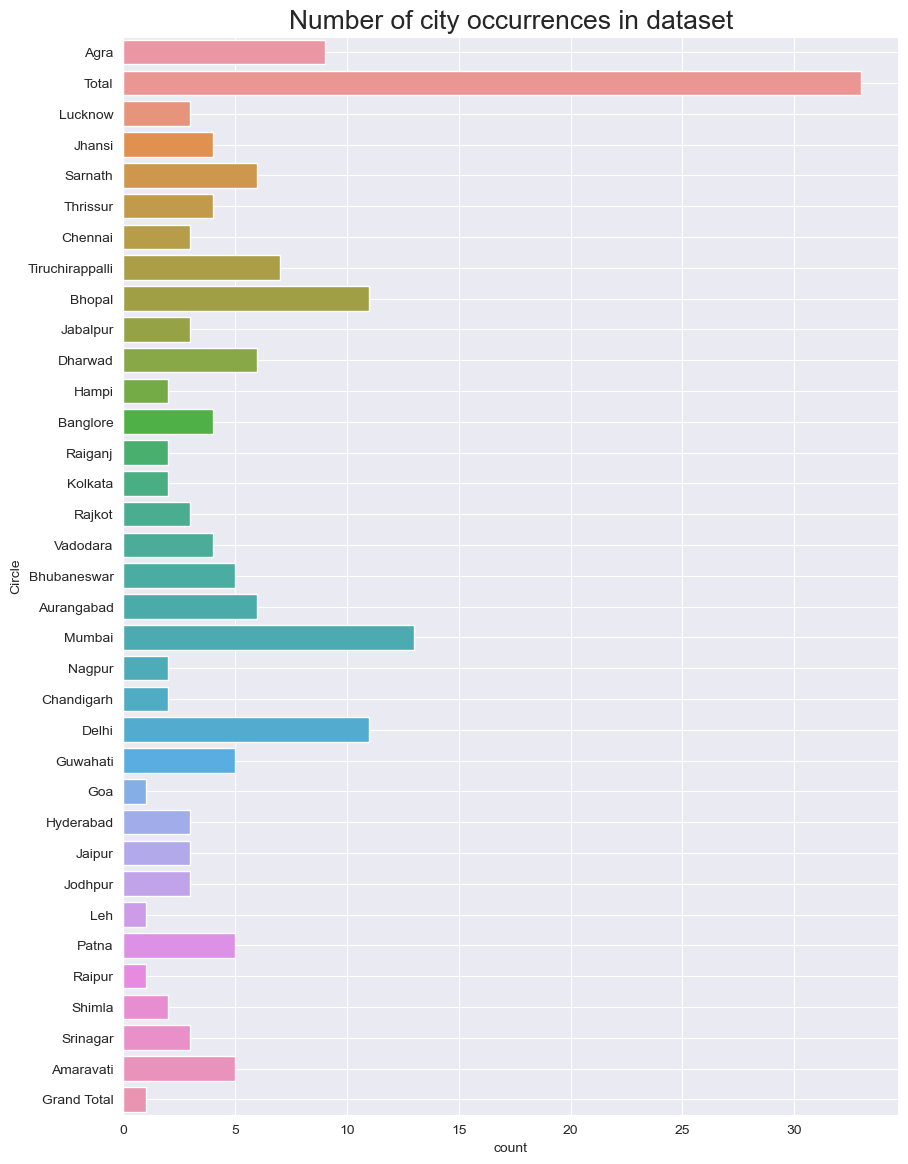

In [ ]:
# Plotting countplot of "Circle" feature
plt.figure(figsize=(10,14))
sns.countplot(data=df, y="Circle", zorder=2)
plt.title("Number of city occurrences in dataset", size=19)
plt.grid(zorder=0)
plt.show()

In [ ]:
# Printing all records of Circle feature
df.Circle.values

array(['Agra', 'Agra', 'Agra', 'Agra', 'Agra', 'Agra', 'Agra', 'Agra',
       'Agra', 'Total', 'Lucknow', 'Lucknow', 'Lucknow', 'Total',
       'Jhansi', 'Jhansi', 'Jhansi', 'Jhansi', 'Total', 'Sarnath',
       'Sarnath', 'Sarnath', 'Sarnath', 'Sarnath', 'Sarnath', 'Total',
       'Thrissur', 'Thrissur', 'Thrissur', 'Thrissur', 'Total', 'Chennai',
       'Chennai', 'Chennai', 'Total', 'Tiruchirappalli',
       'Tiruchirappalli', 'Tiruchirappalli', 'Tiruchirappalli',
       'Tiruchirappalli', 'Tiruchirappalli', 'Tiruchirappalli', 'Total',
       'Bhopal', 'Bhopal', 'Bhopal', 'Bhopal', 'Bhopal', 'Bhopal',
       'Bhopal', 'Bhopal', 'Bhopal', 'Bhopal', 'Bhopal', 'Total',
       'Jabalpur', 'Jabalpur', 'Jabalpur', 'Total', 'Dharwad', 'Dharwad',
       'Dharwad', 'Dharwad', 'Dharwad', 'Dharwad', 'Total', 'Hampi',
       'Hampi', 'Total', 'Banglore', 'Banglore', 'Banglore', 'Banglore',
       'Total', 'Raiganj', 'Raiganj', 'Total', 'Kolkata', 'Kolkata',
       'Total', 'Rajkot', 'Rajkot', 'R

In [ ]:
# Printing all records of "Agra" Circle with its Total
df.iloc[:10]

Circle  Name of the Monument   Domestic-2019-20  Foreign-2019-20  \
0   Agra              Taj Mahal           4429710           645415   
1   Agra              Agra Fort           1627154           386522   
2   Agra         Fatehpur Sikri            454376           184751   
3   Agra    Akbar Tomb Sikandra            229270            19625   
4   Agra   Mariam tomb Sikandra             22517              414   
5   Agra  Itimad-ud-Daulah-Tomb            132800            82692   
6   Agra               Ram Bagh             84051              355   
7   Agra            Mehtab Bagh            178574            62325   
8   Agra              Mausoleum            474462            12536   
9  Total                  Total           7632914          1394635   

   Domestic-2020-21  Foreign-2020-21  % Growth 2021-21/2019-20-Domestic  \
0           1259892             9034                             -71.56   
1            371242             2810                             -77.18   
2            107835              574                             -76.27   
3             99509              321                             -56.60   
4              9765               31                             -56.63   
5             41016              410                             -69.11   
6             18599               54                             -77.87   
7             62652              544                             -64.92   
8             91185              321                             -80.78   
9           2061695            14099                             -72.99   

   % Growth 2021-21/2019-20-Foreign  
0                            -98.60  
1                            -99.27  
2                            -99.69  
3                            -98.36  
4                            -92.51  
5                            -99.50  
6                            -84.79  
7                            -99.13  
8                            -97.44  
9                            -98.99

In [ ]:
# Calculating sum of Agra features
sum_of_Agra = df[df['Circle'] == 'Agra'][df.columns[df.dtypes != "object"]].sum()
sum_of_Agra

Domestic-2019-20                     7632914.00
Foreign-2019-20                      1394635.00
Domestic-2020-21                     2061695.00
Foreign-2020-21                        14099.00
% Growth 2021-21/2019-20-Domestic       -630.92
% Growth 2021-21/2019-20-Foreign        -869.29
dtype: float64

In [ ]:
df['Name of the Monument '] = df['Name of the Monument '].str.slice(stop=25) + '...'

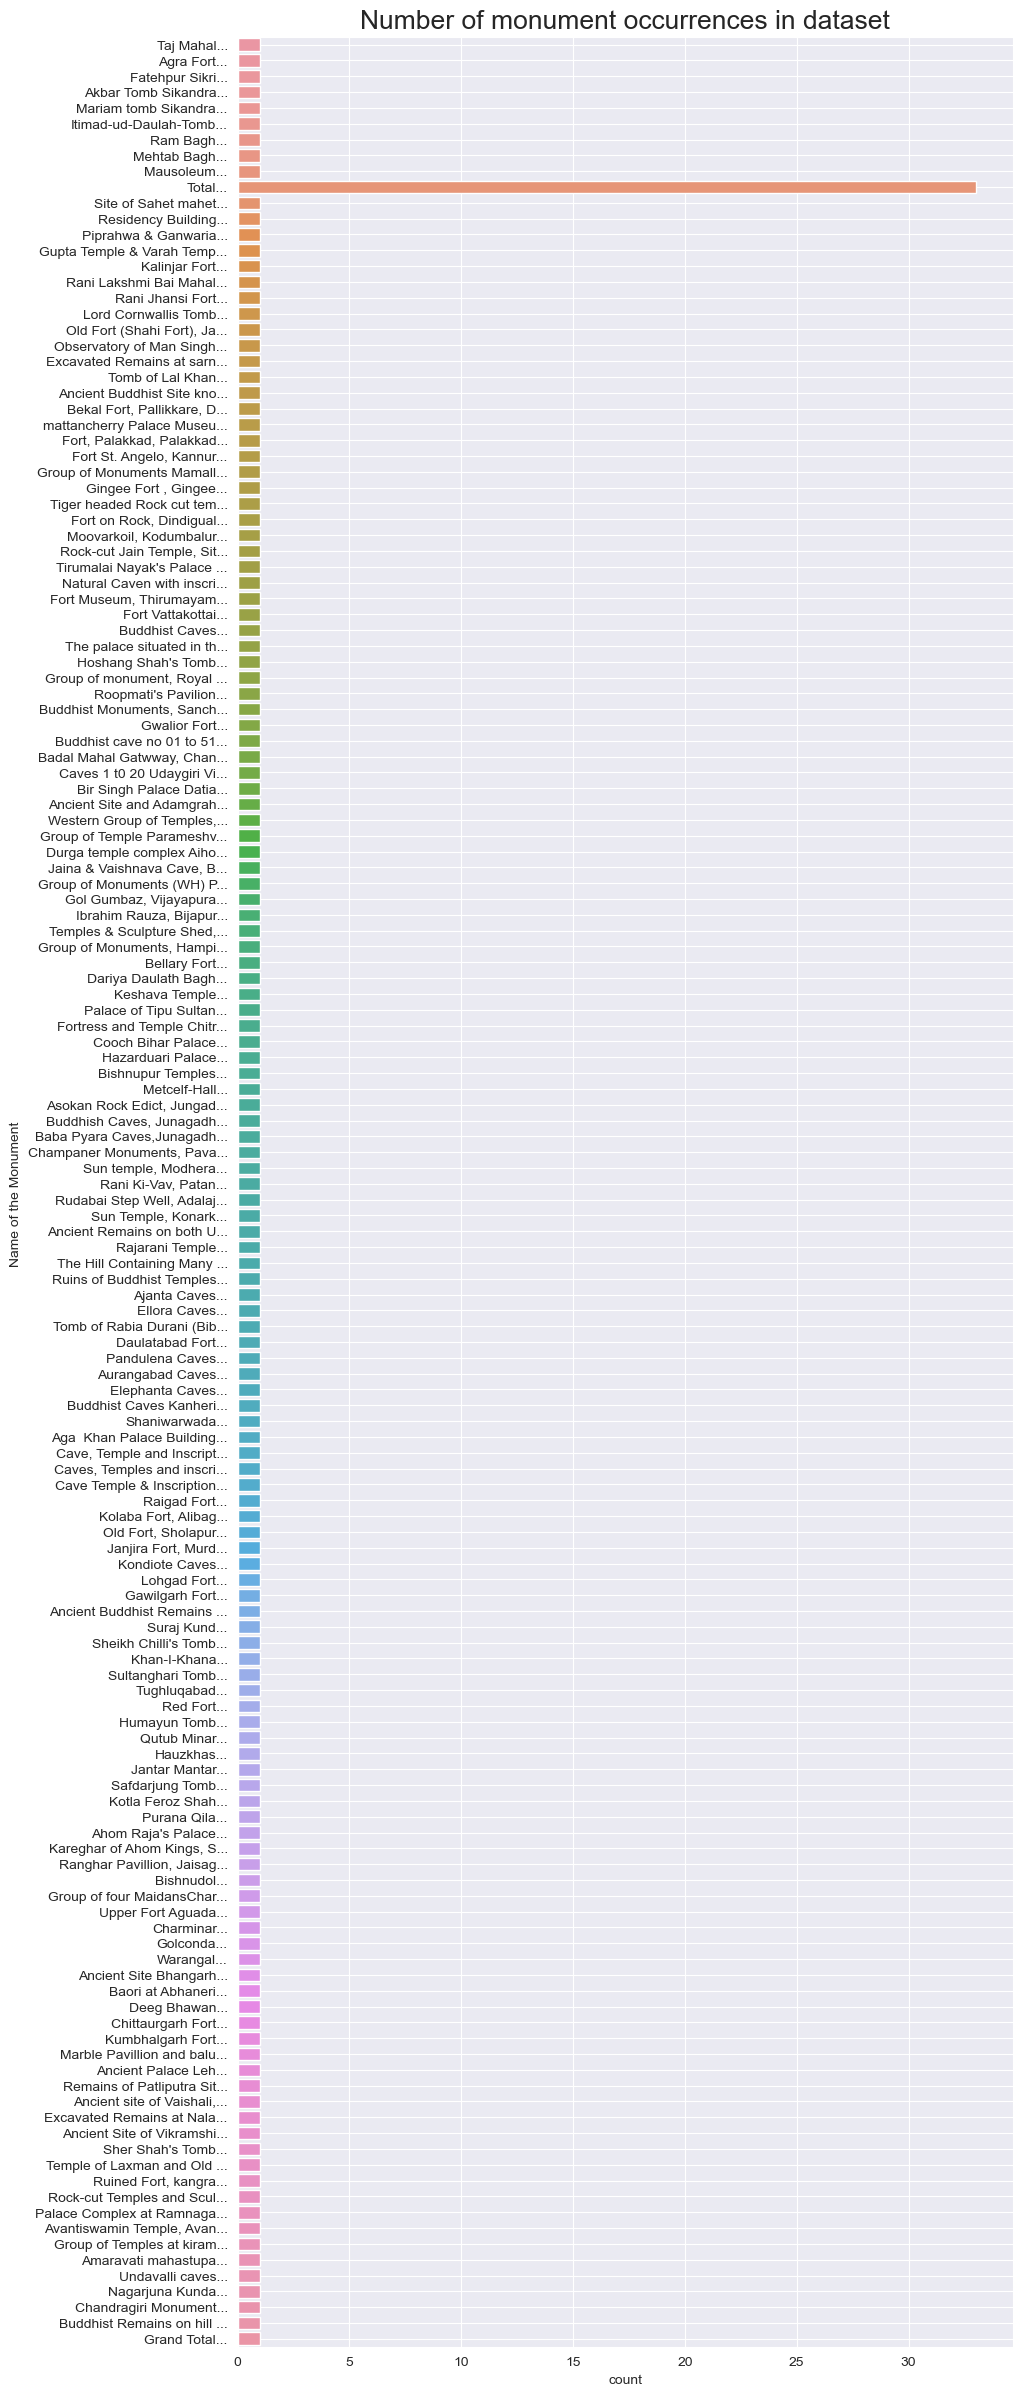

In [ ]:
# Plotting countplot of "Name of the Monument " feature
plt.figure(figsize=(10,30))
sns.countplot(data=df, y="Name of the Monument ", zorder=2)
plt.title("Number of monument occurrences in dataset", size=19)
plt.grid(zorder=0)
plt.show()

In [ ]:
# Creating new dataframe without containing "Total" and "Grand Total" records
clean_df = df[~df["Circle"].isin(["Total", "Grand Total"])]

In [ ]:
# Calculating descriptive statistics of numerical features
clean_df.describe()

Domestic-2019-20  Foreign-2019-20  Domestic-2020-21  Foreign-2020-21  \
count      1.440000e+02       144.000000      1.440000e+02       144.000000   
mean       3.028269e+05     19142.784722      9.134081e+04      2887.909722   
std        5.342054e+05     70357.791001      1.530237e+05     13450.084745   
min        5.300000e+02         0.000000      0.000000e+00         0.000000   
25%        3.940775e+04       140.000000      1.224275e+04        11.750000   
50%        1.181300e+05      1065.000000      4.614800e+04        75.000000   
75%        3.354180e+05      7758.750000      1.024565e+05       233.500000   
max        4.429710e+06    645415.000000      1.259892e+06    105816.000000   

       % Growth 2021-21/2019-20-Domestic  % Growth 2021-21/2019-20-Foreign  
count                         144.000000                        144.000000  
mean                          -20.979097                        836.388542  
std                           373.211458                       6544.326666  
min                          -100.000000                       -100.000000  
25%                           -77.290000                        -99.080000  
50%                           -64.525000                        -97.120000  
75%                           -50.855000                        -82.715000  
max                          4233.770000                      62078.430000

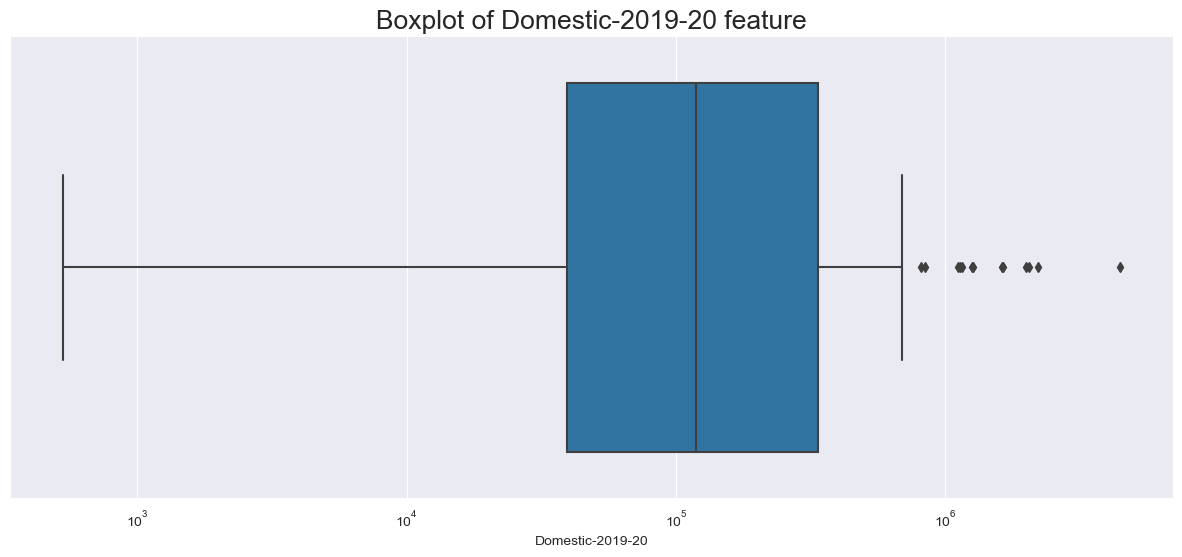

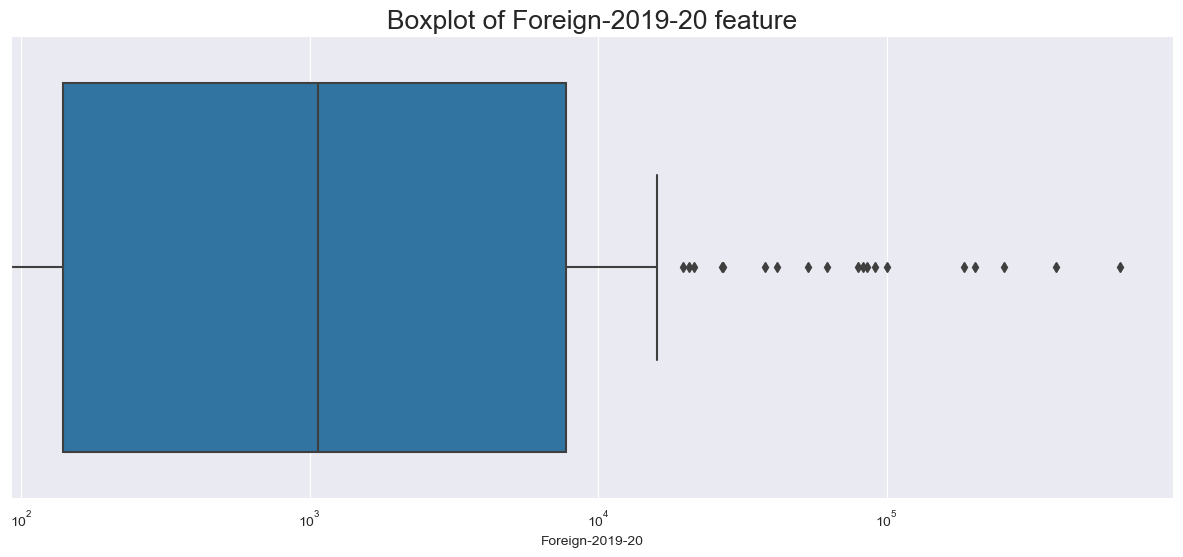

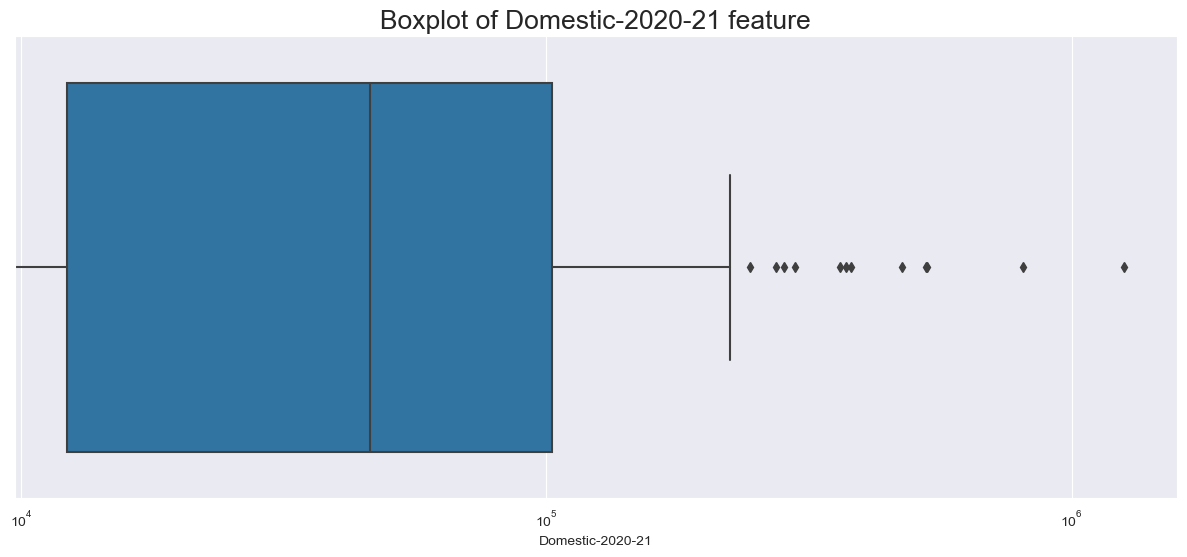

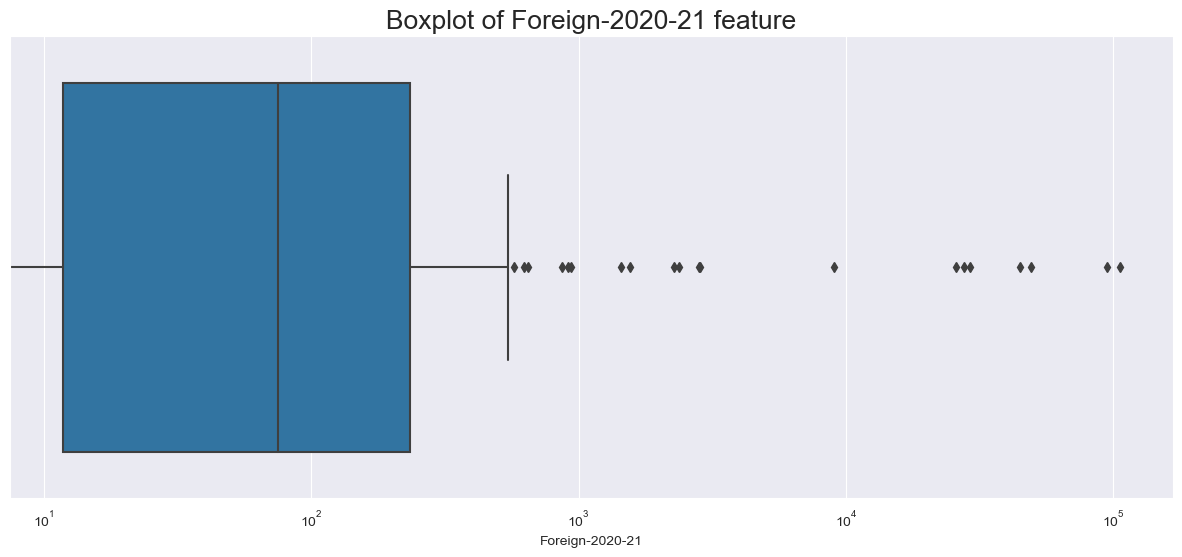

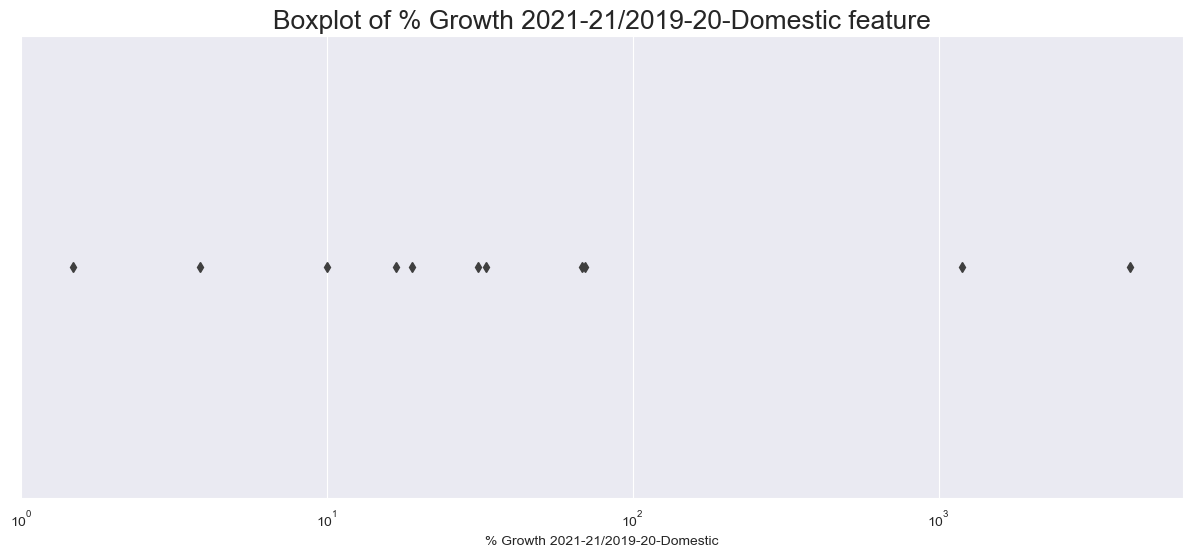

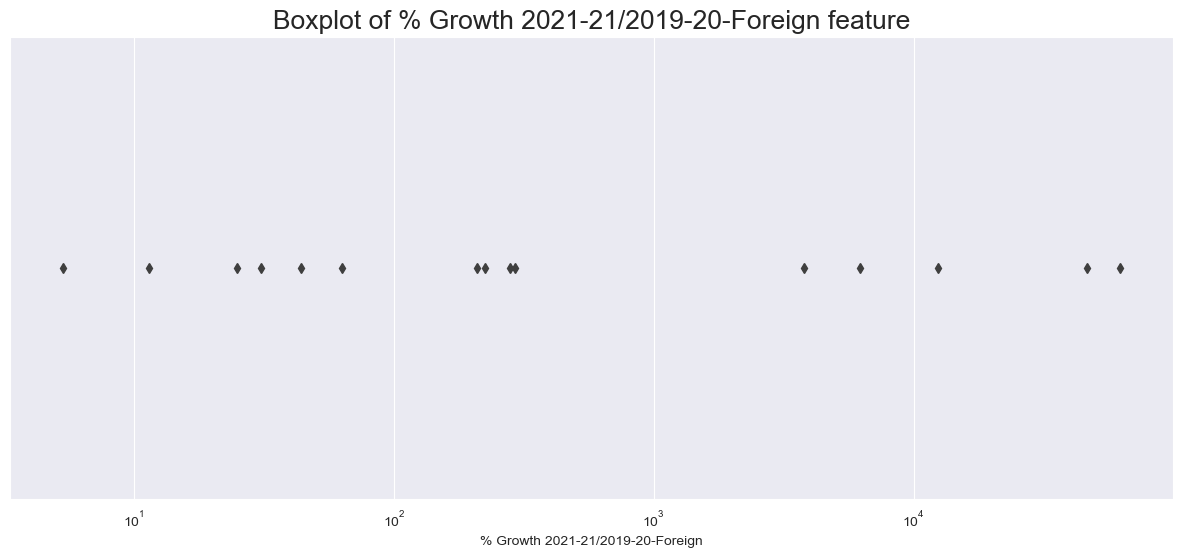

In [ ]:
# Plotting Boxplot of each numerical feature
for numeric_feature in df.columns[df.dtypes != "object"]:
    plt.figure(figsize=(15,6))
    sns.boxplot(data=clean_df, x=numeric_feature);
    plt.title(f"Boxplot of {numeric_feature} feature", size=19)
    plt.xscale('log')
    plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encoding discrete features
numerical_df = clean_df.copy()
numerical_df["Circle"] = LabelEncoder().fit_transform(clean_df["Circle"])
numerical_df["Name of the Monument "] = LabelEncoder().fit_transform(clean_df["Name of the Monument "])

# Displaying first 5 rows
numerical_df.head()

Circle  Name of the Monument   Domestic-2019-20  Foreign-2019-20  \
0       0                    129           4429710           645415   
1       0                      1           1627154           386522   
2       0                     48            454376           184751   
3       0                      4            229270            19625   
4       0                     88             22517              414   

   Domestic-2020-21  Foreign-2020-21  % Growth 2021-21/2019-20-Domestic  \
0           1259892             9034                             -71.56   
1            371242             2810                             -77.18   
2            107835              574                             -76.27   
3             99509              321                             -56.60   
4              9765               31                             -56.63   

   % Growth 2021-21/2019-20-Foreign  
0                            -98.60  
1                            -99.27  
2                            -99.69  
3                            -98.36  
4                            -92.51

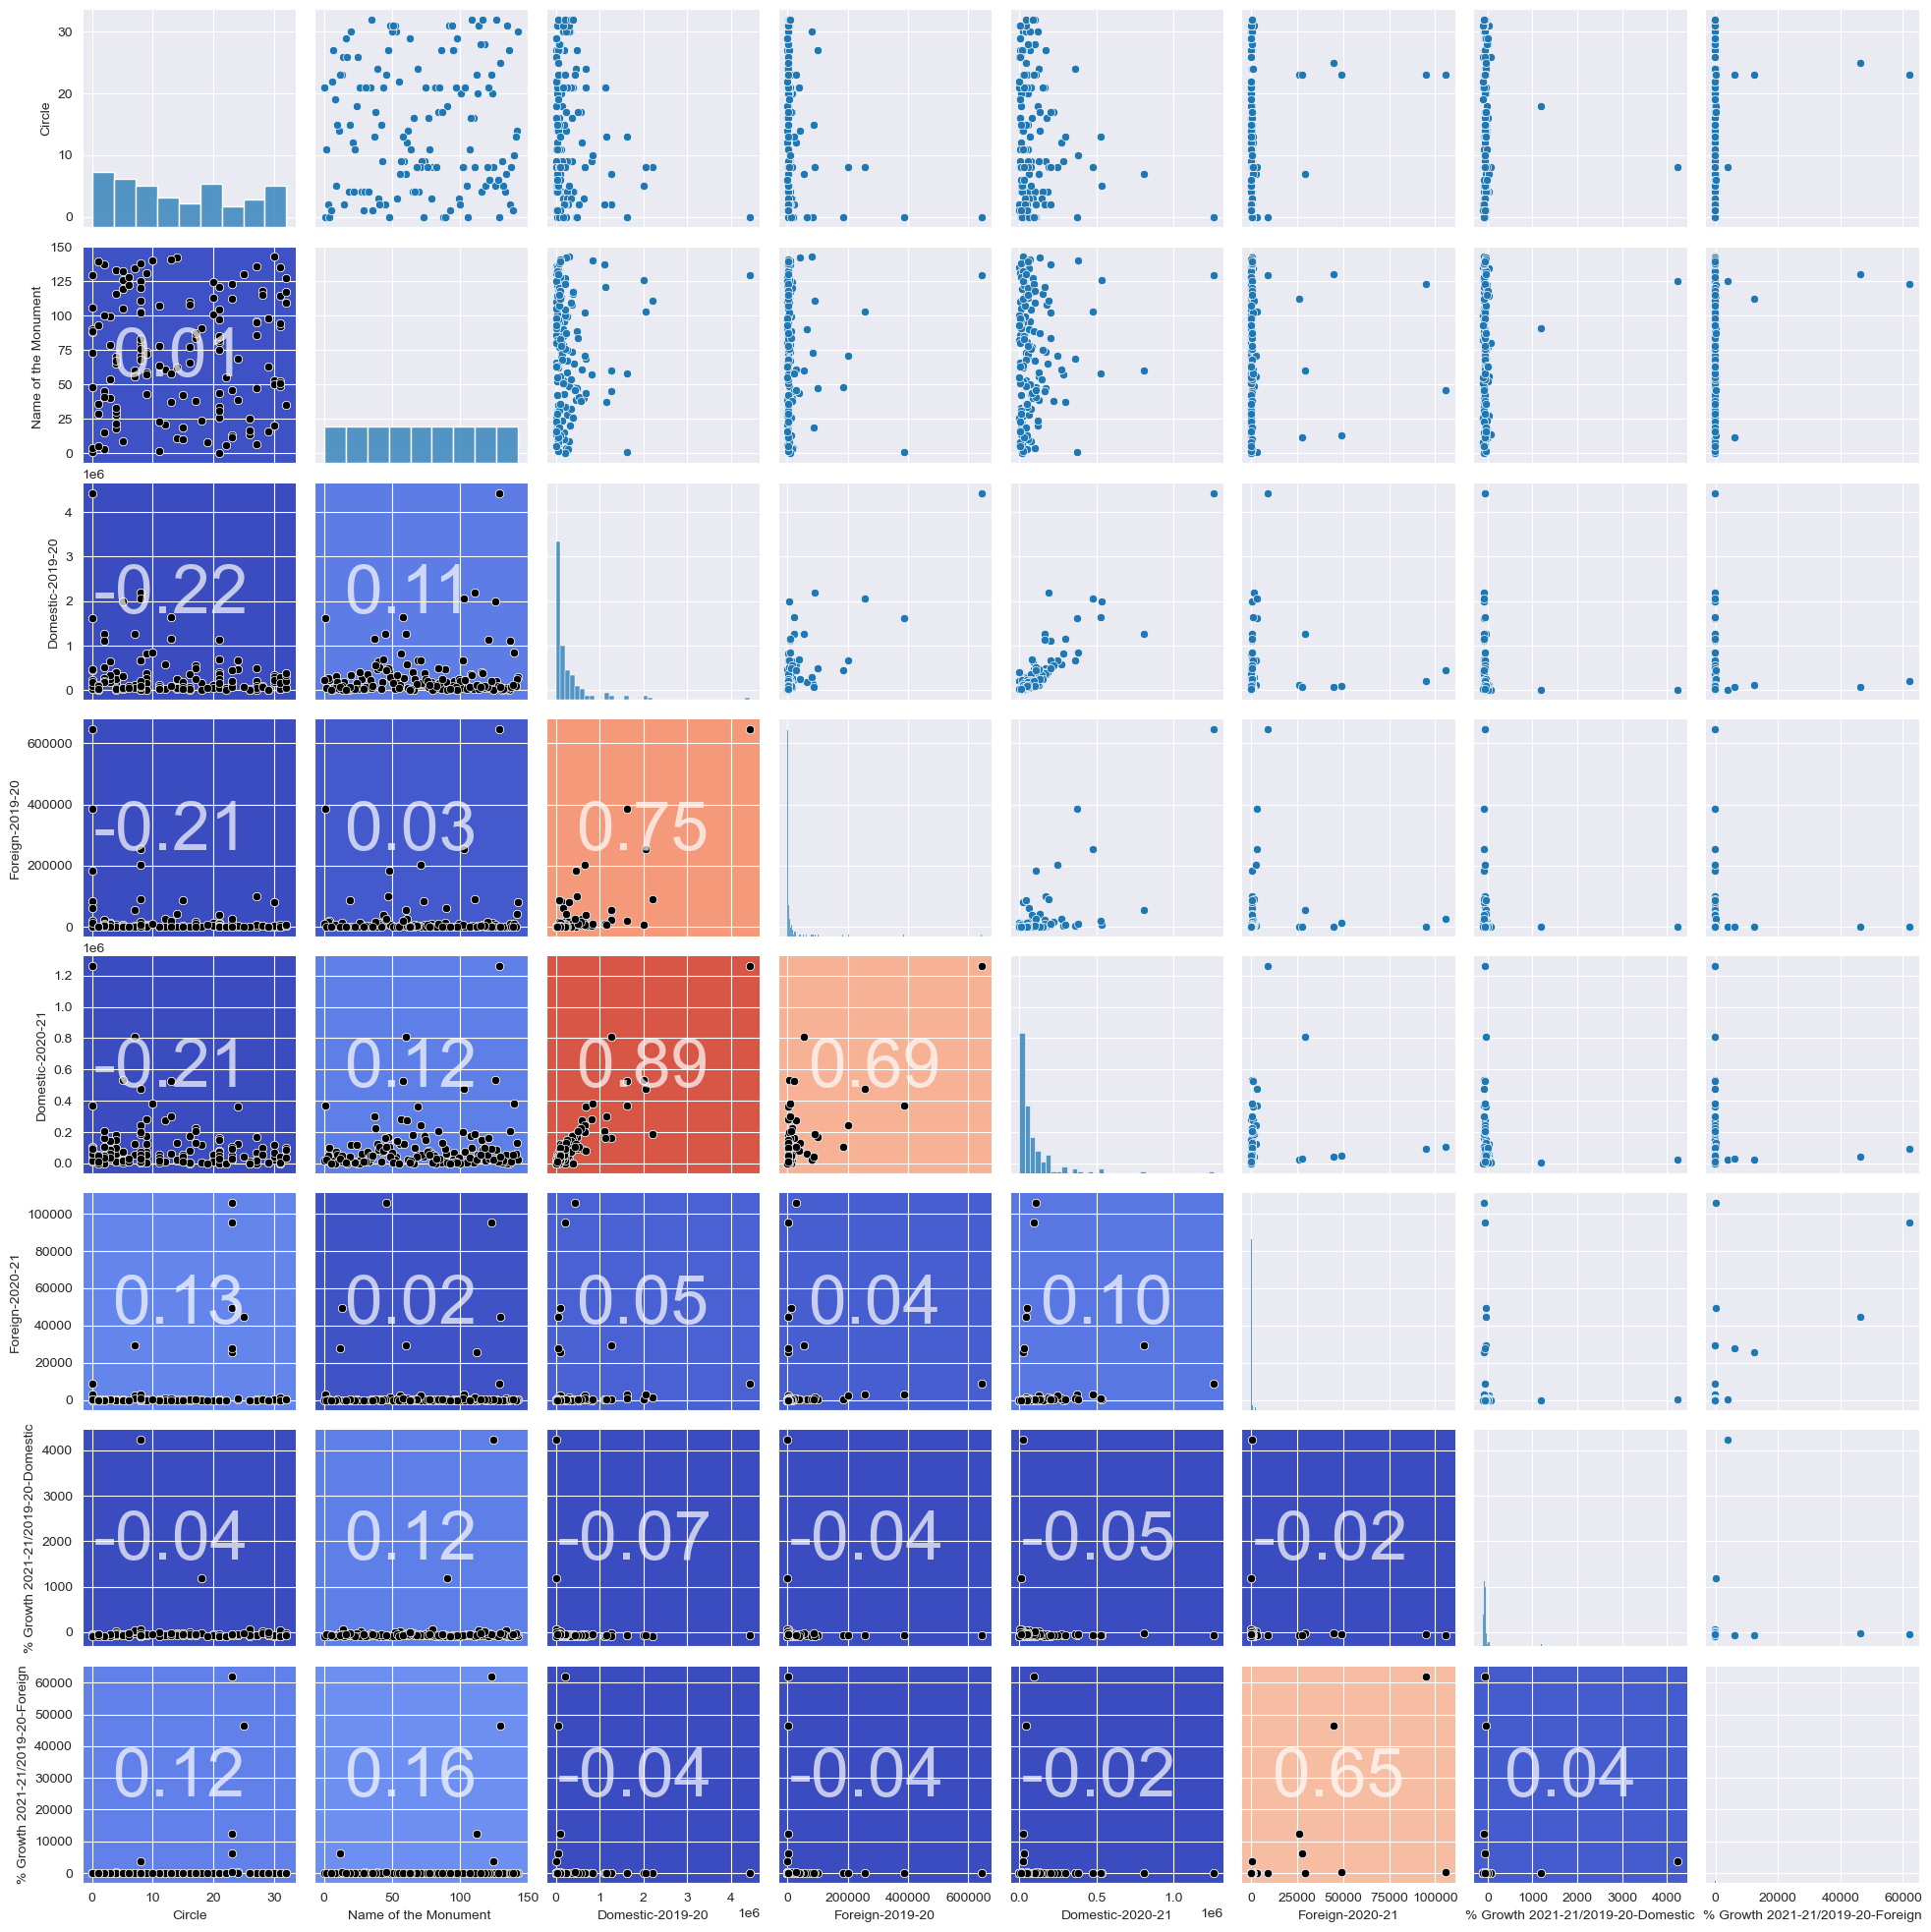

In [ ]:
from scipy.stats import pearsonr
import matplotlib.cm as cm

def corrfunc(x, y, ax=None, **kws):
    """Function to plot the correlation coefficient of a plot"""
    r, _ = pearsonr(x, y)
    cmap = sns.diverging_palette(-1, 1, as_cmap=True)
    cmap = cm.get_cmap('coolwarm')
    ax = ax or plt.gca()
    ax.set_facecolor(color=cmap(r))
    ax.annotate(f'{r:.2f}', xy=(.14, .4) if r>0 else (.05, .4), xycoords=ax.transAxes,
                fontsize=50, alpha=0.7, color="w")

# Plotting pairplot
g = sns.pairplot(numerical_df)
g.map_lower(corrfunc)
g.map_lower(sns.scatterplot, color='black')
plt.show()

In [ ]:
# Creating new column "total-2019-20-visitors" and "total-2020-21-visitors"
clean_df['total-2019-20-visitors'] = clean_df[['Domestic-2019-20', 'Foreign-2019-20']].sum(axis=1)
clean_df['total-2020-21-visitors'] = clean_df[['Domestic-2020-21', 'Foreign-2020-21']].sum(axis=1)

# Sorting data by 'total-2019-20-visitors'
clean_df = clean_df.sort_values(by='total-2019-20-visitors', ascending=False)

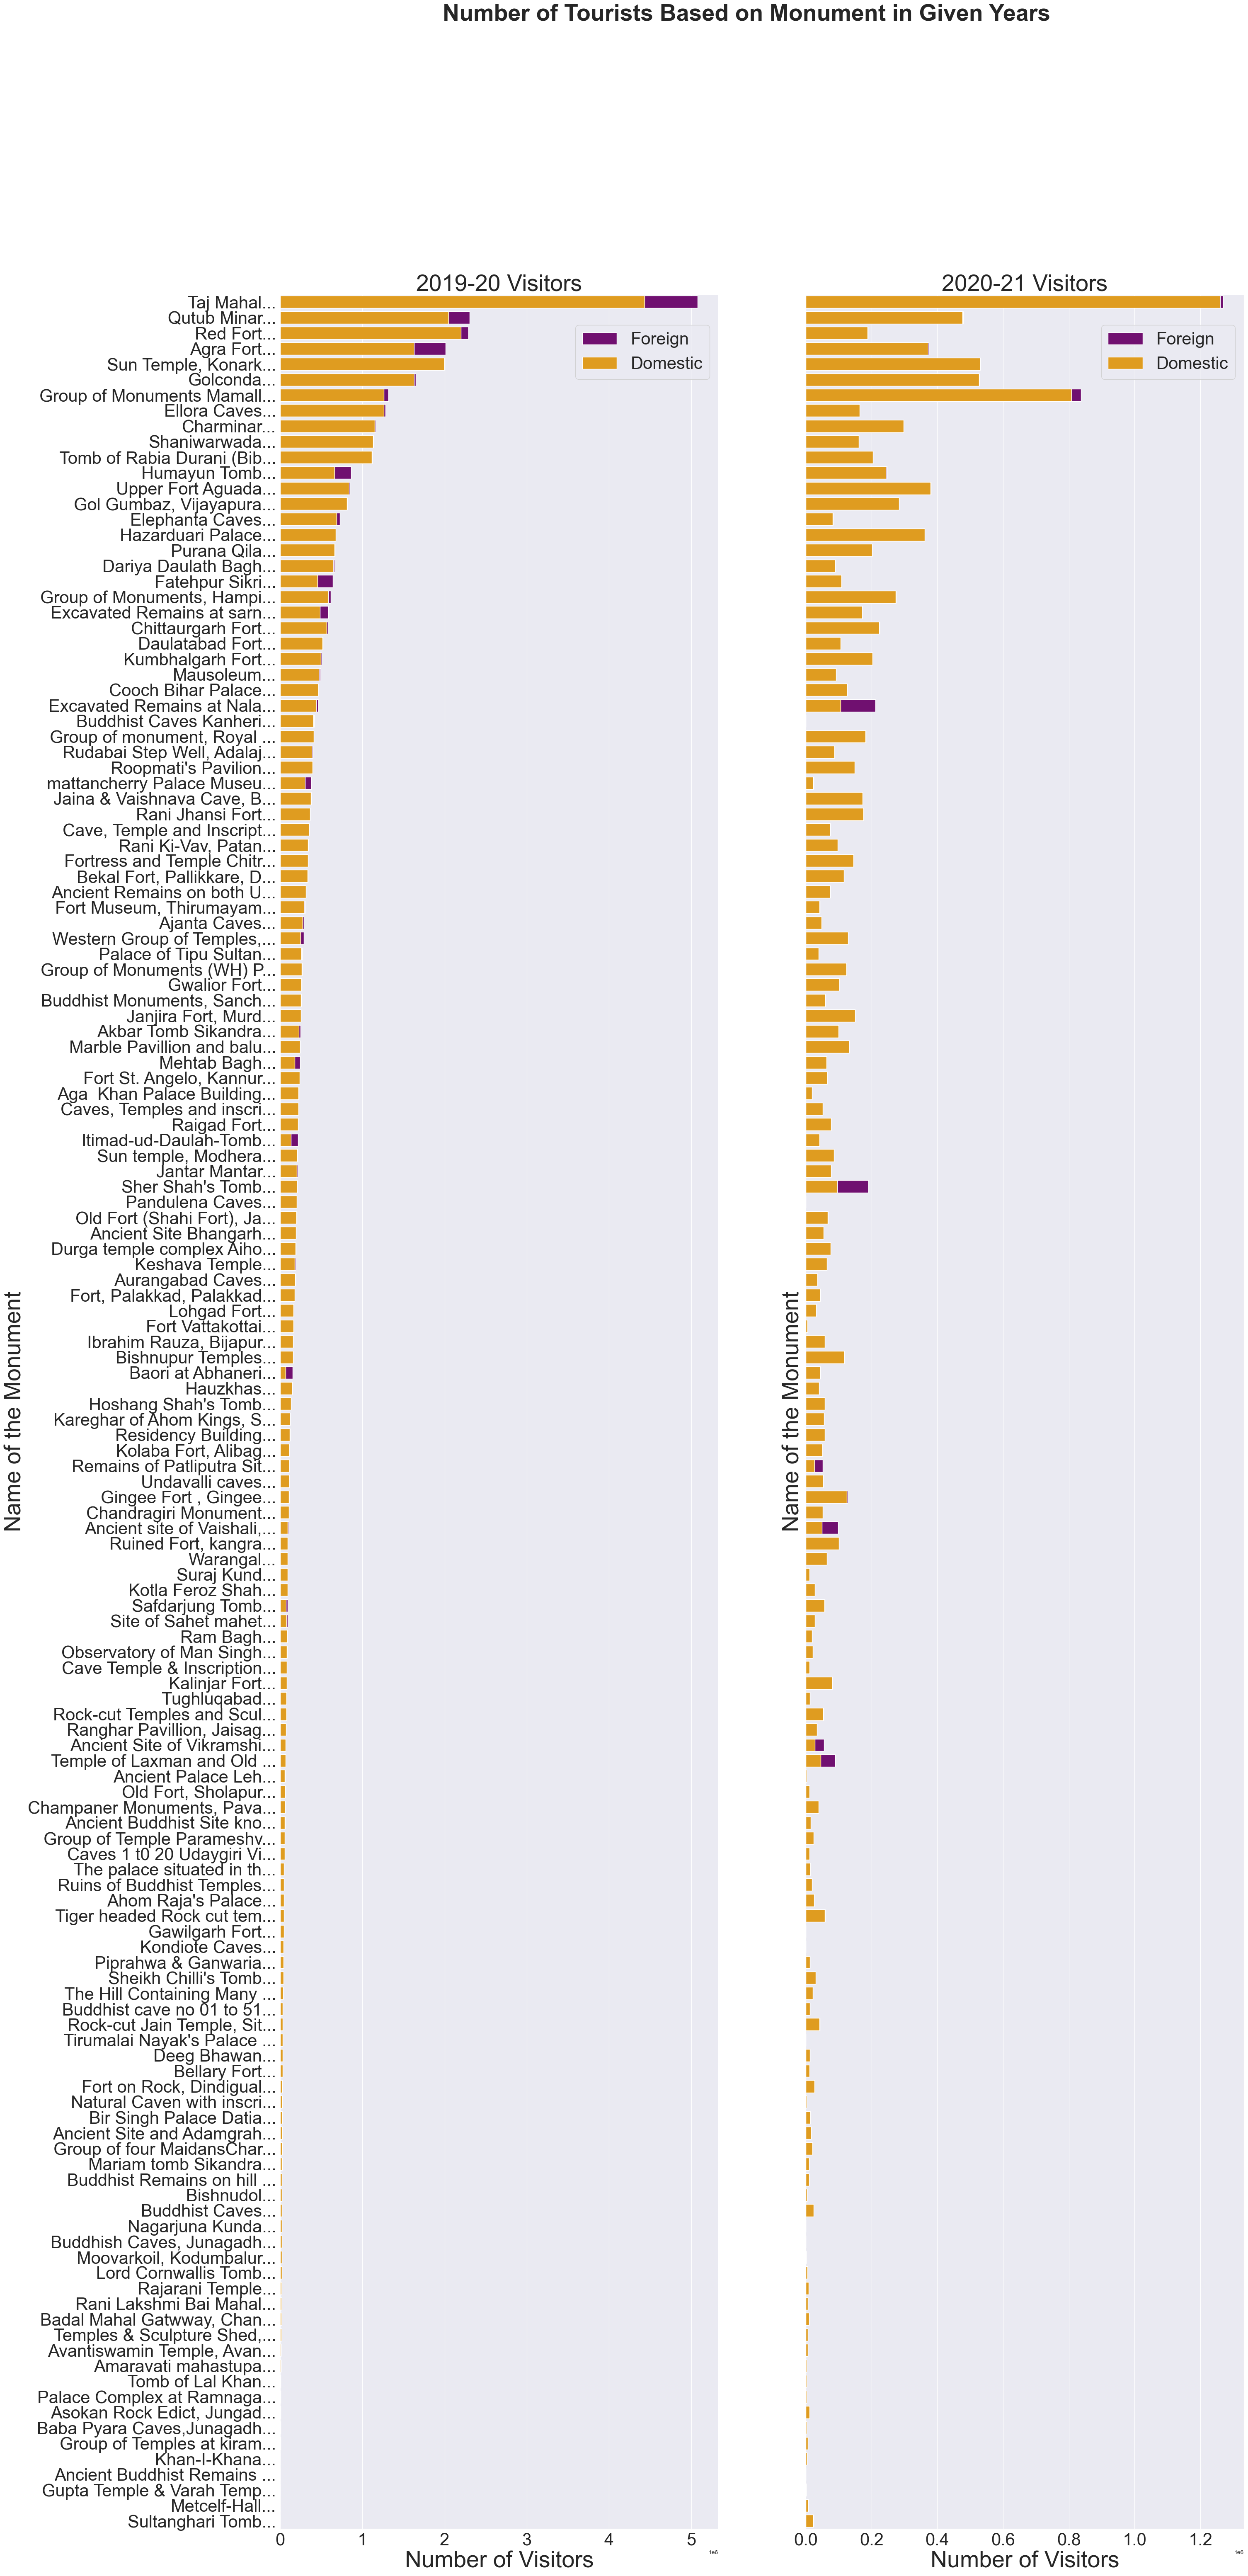

In [ ]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(30,70))

# Plotting barplot of 2019-20 Visitors
plt.subplot(1,2,1)
sns.barplot(y='Name of the Monument ', x="total-2019-20-visitors",data=clean_df, color='purple', label='Foreign')
sns.barplot(y='Name of the Monument ', x='Domestic-2019-20', data=clean_df, color='orange', label='Domestic')
plt.title("2019-20 Visitors", fontsize=40)
plt.legend(bbox_to_anchor=(1, 0.99), loc='upper right', prop={'size': 30});
plt.xticks(fontsize=30)
plt.xlabel('Number of Visitors', fontsize=40)
plt.yticks(fontsize=30)
plt.ylabel('Name of the Monument', fontsize=40)

# Plotting barplot of 2020-21 Visitors
plt.subplot(1,2,2)
sns.barplot(y='Name of the Monument ', x="total-2020-21-visitors", data=clean_df, color='purple', label='Foreign')
sns.barplot(y='Name of the Monument ', x='Domestic-2020-21', data=clean_df, color='orange', label='Domestic')
plt.title("2020-21 Visitors", fontsize=40)
plt.legend(bbox_to_anchor=(1, 0.99), loc='upper right', prop={'size': 30});
plt.xticks(fontsize=30)
plt.xlabel('Number of Visitors', fontsize=40)
plt.ylabel('Name of the Monument', fontsize=40)

fig.suptitle("Number of Tourists Based on Monument in Given Years", fontsize=40, fontweight='bold');

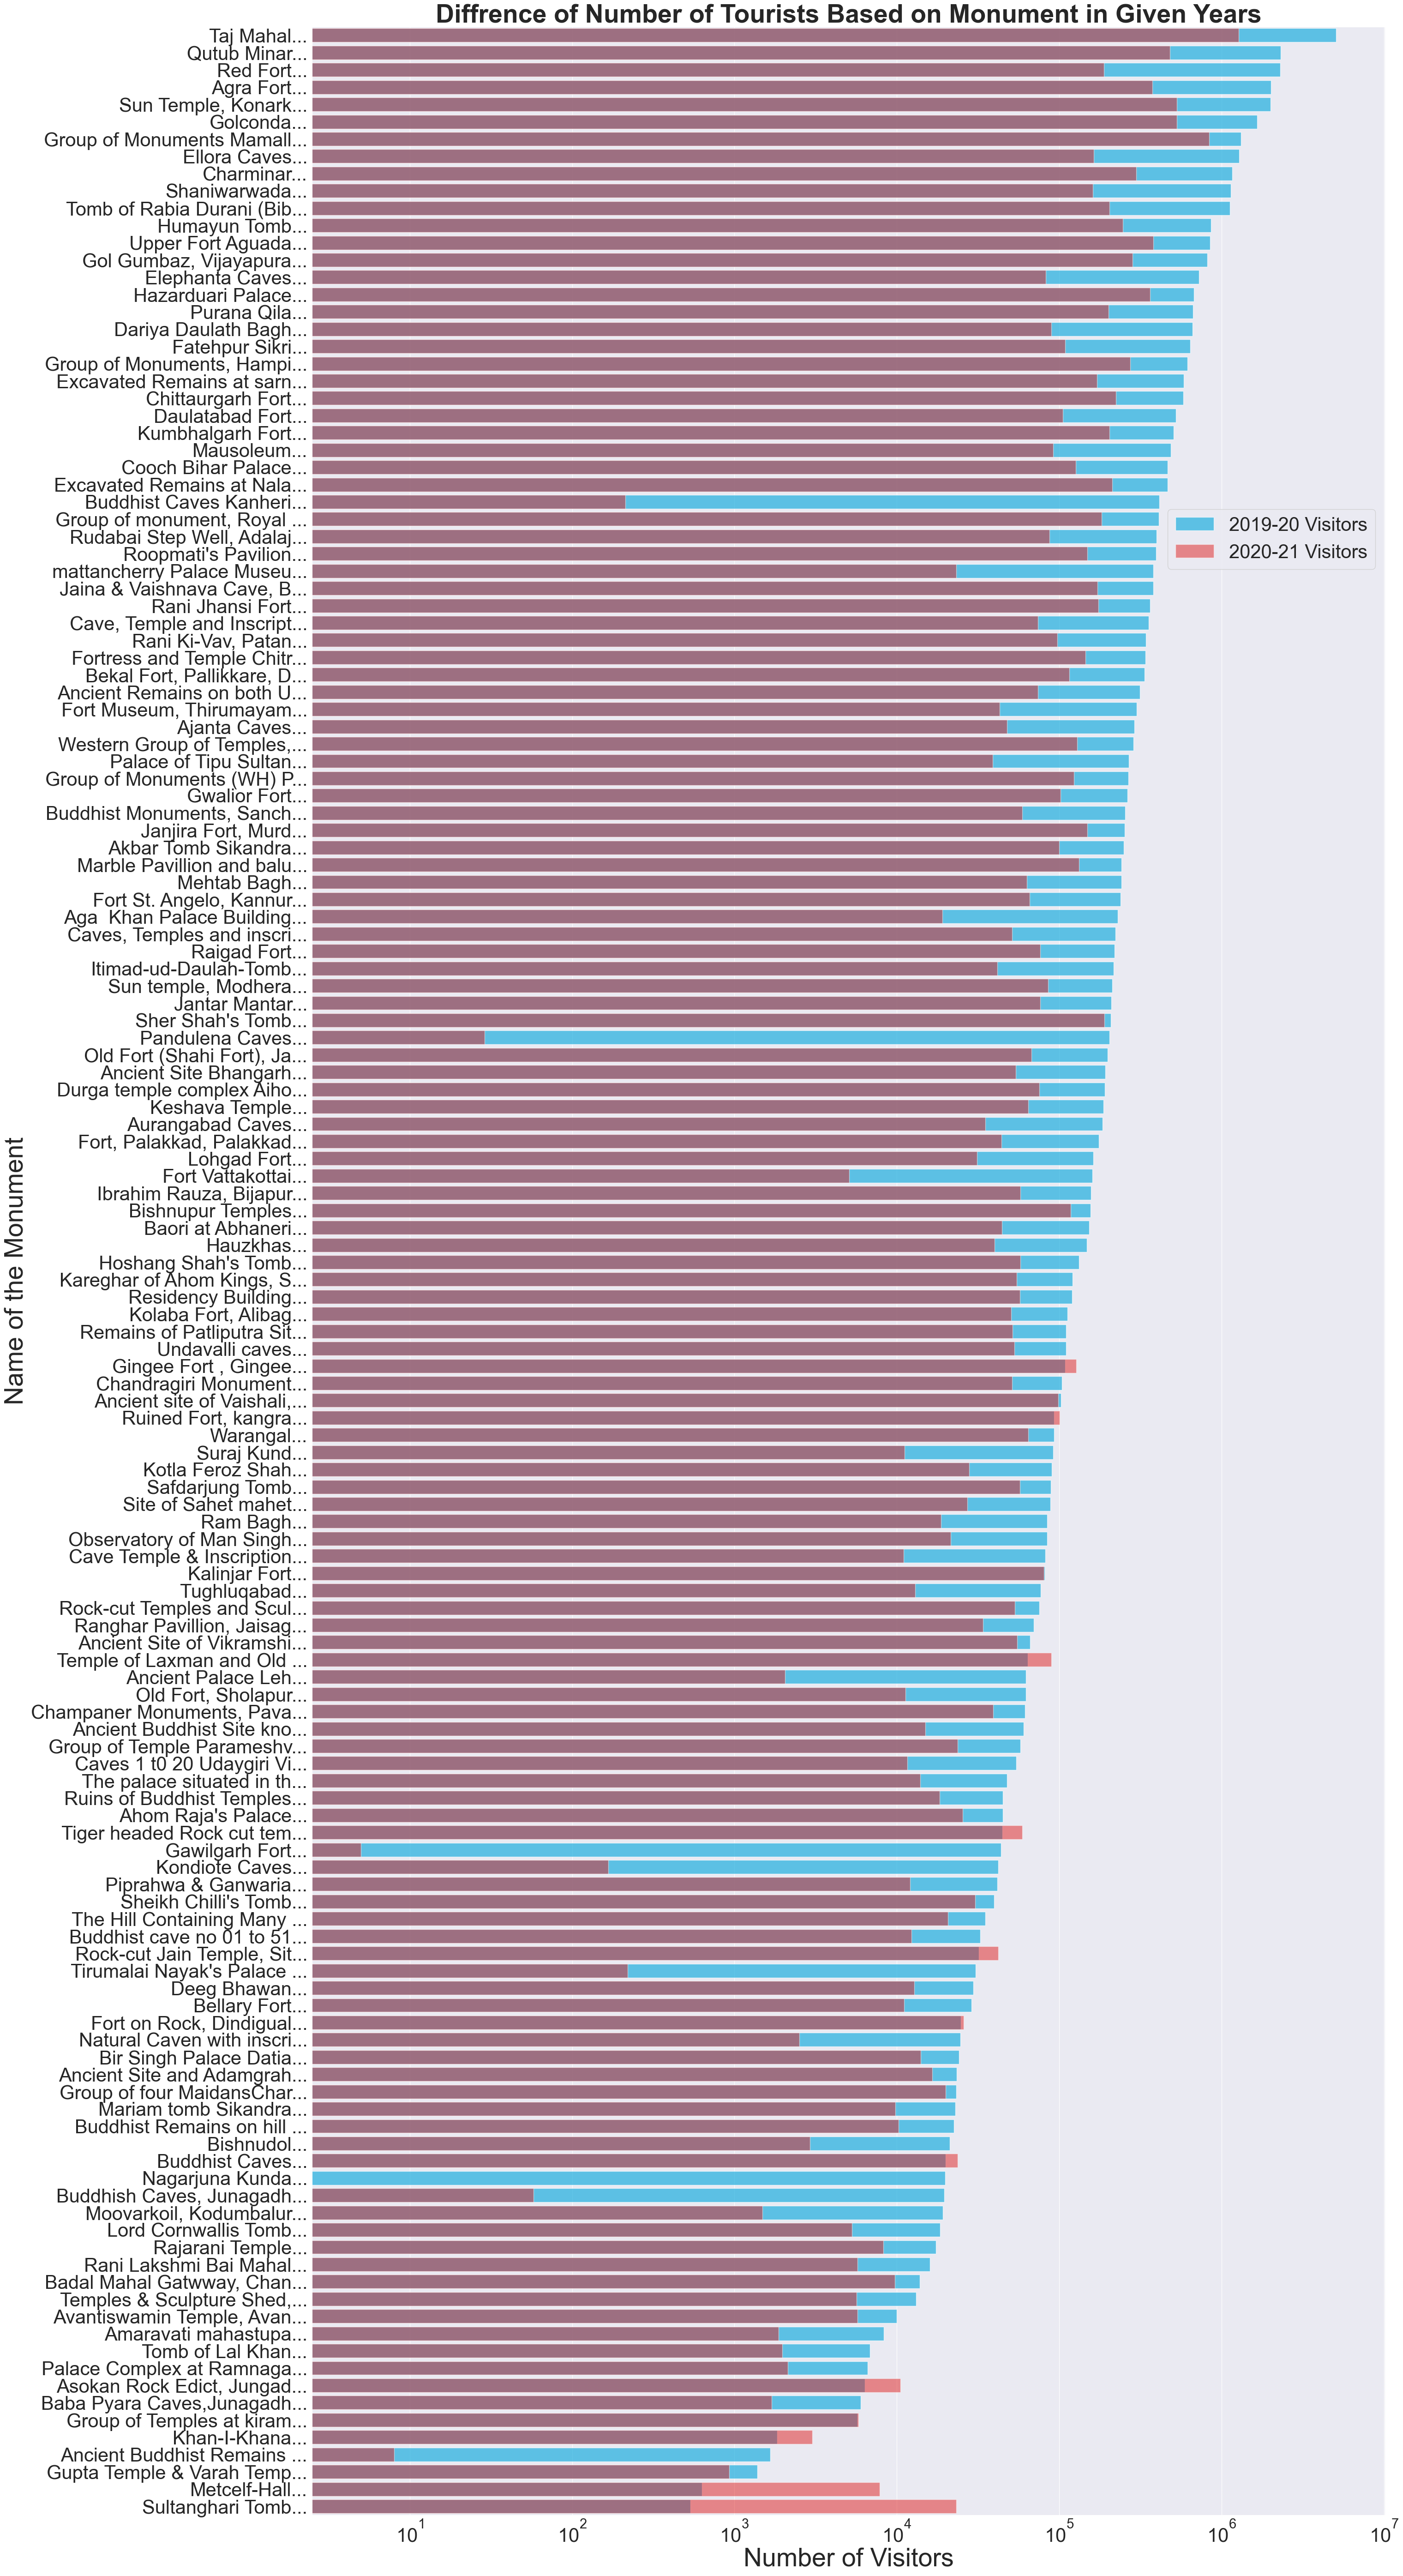

In [ ]:
# Plotting barplots of total visitors during those years
plt.figure(figsize=(30,70))
ax = sns.barplot(y='Name of the Monument ', x="total-2019-20-visitors",data=clean_df, color='#00BFFF', label='2019-20 Visitors', alpha=0.7)
sns.barplot(y='Name of the Monument ', x="total-2020-21-visitors", data=clean_df, color='red', label='2020-21 Visitors', alpha=0.5)
plt.title("Diffrence of Number of Tourists Based on Monument in Given Years", fontsize=40, fontweight='bold');
plt.legend(bbox_to_anchor=(1, 0.81), loc='upper right', prop={'size': 30});
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Number of Visitors', fontsize=40)
plt.ylabel('Name of the Monument', fontsize=40);
plt.xscale("log")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = clean_df[['total-2019-20-visitors']]
y = clean_df['total-2020-21-visitors']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model coefficients and evaluation metrics
print("Linear Regression Coefficients:", model.coef_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Linear Regression Coefficients: [0.23478681]
Mean Squared Error: 1932663635.4020114
R-squared: 0.6658902095383252
